In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class CustomDataset(Dataset):
    def __init__(self, file_path): 
        data = pd.read_csv(file_path)
        self.features = data.drop(columns=['objid', 'specobjid', 'class', 'run', 'rerun', 'camcol', 'field', 'ra', 'dec', 'redshift'], axis=1)
        print(len(self.features))
        print(self.features.shape[1])
        self.labels = data['class']

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        feature = self.features.iloc[index]
        label_str = self.labels.iloc[index]

        # Convert label string to integer
        if label_str == 'GALAXY':
            label = 0
        elif label_str == 'STAR':
            label = 1
        else:
            label = 2

        feature = torch.tensor(feature, dtype=torch.float32).to(device)  # Move feature tensor to GPU
        label = torch.tensor(label, dtype=torch.long).to(device)  # Move label tensor to GPU

        return feature, label


In [3]:
csv_file = 'photofeatures_exp1.csv'
dataset = CustomDataset(csv_file)
X = []
y = []

for i in range(len(dataset)):
    feature, label = dataset[i]
    X.append(feature)
    y.append(label)

X = torch.stack(X)
y = torch.stack(y)


239999
24


In [4]:
tree = DecisionTreeClassifier()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.143, random_state=42)
X_train = torch.Tensor(X_train).to(device)
y_train = torch.Tensor(y_train).long().to(device)
X_val = torch.Tensor(X_val).to(device)
y_val = torch.Tensor(y_val).long().to(device)
X_test = torch.Tensor(X_test).to(device)
y_test = torch.Tensor(y_test).long().to(device)

In [6]:
tree.fit(X_train.cpu().numpy(), y_train.cpu().numpy())

DecisionTreeClassifier()

In [7]:
y_val_pred = tree.predict(X_val.cpu().numpy())
y_val = y_val.cpu().numpy()

In [8]:
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy for decision tree:", accuracy)


Validation Accuracy for decision tree: 0.8797202797202798


In [9]:
names = {0:'GALAXY',1:'STAR',2:'QSO'}
y_test_pred = tree.predict(X_test.cpu().numpy())
y_test = y_test.cpu().numpy()
y_true = [names.get(label) for label in y_test]
y_pred = [names.get(label) for label in y_test_pred]
accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy for decision tree:", accuracy)

Test Accuracy for decision tree: 0.8826333333333334


In [10]:
precision = precision_score(y_true,y_pred, average='weighted',zero_division =0 )
recall = recall_score(y_true,y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8825141307859978
Recall: 0.8826333333333334


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators = 10,random_state=50)
rf.fit(X_train.cpu().numpy(), y_train.cpu().numpy())

RandomForestClassifier(n_estimators=10, random_state=50)

In [13]:
y_val_predrf = rf.predict(X_val.cpu().numpy())
accuracyvalrf = accuracy_score(y_val, y_val_predrf)
print("Validation Accuracy:", accuracyvalrf)

Validation Accuracy: 0.911022311022311


In [14]:
y_test_predrf = rf.predict(X_test.cpu().numpy())
y_truerf = [names.get(label) for label in y_test]
y_predrf = [names.get(label) for label in y_test_predrf]
accuracytestrf = accuracy_score(y_true, y_predrf)
print("Test Accuracy for random forest:", accuracytestrf)

Test Accuracy for random forest: 0.9086333333333333


In [15]:
precisionrf = precision_score(y_truerf,y_predrf, average='weighted',zero_division =0 )
recallrf = recall_score(y_truerf,y_predrf, average='weighted')

print("Precision:", precisionrf)
print("Recall:", recallrf)

Precision: 0.9084206275491811
Recall: 0.9086333333333333


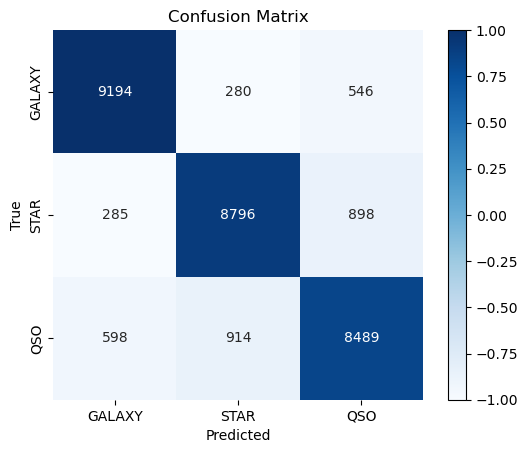

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
class_names = ['GALAXY', 'STAR', 'QSO']
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
dummy = plt.imshow([[-1, -1], [1, 1]], cmap='Blues')
plt.colorbar(dummy)
plt.show()

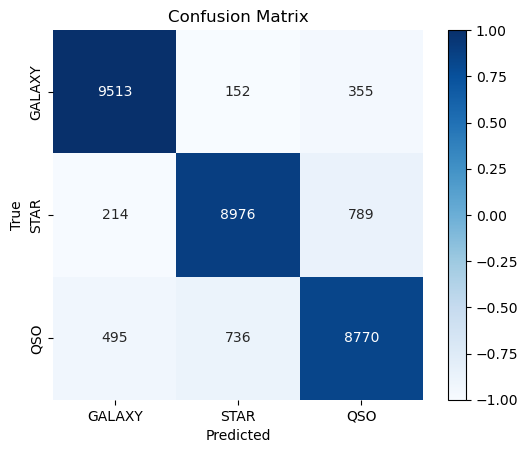

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predrf)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
class_names = ['GALAXY', 'STAR', 'QSO']
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
dummy = plt.imshow([[-1, -1], [1, 1]], cmap='Blues')
plt.colorbar(dummy)
plt.show()